In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bank_d=pd.read_csv('/content/portu_banking_final.csv')
bank_d.tail(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
17685,26,admin.,married,high.school,no,no,no,telephone,jun,tue,48,2,999.0,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0.0
17686,32,housemaid,married,high.school,no,no,no,telephone,may,tue,226,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
17687,55,technician,single,professional.course,no,yes,yes,cellular,mar,mon,217,2,999.0,0,nonexistent,-1.8,92.843,-50.0,1.703,5099.1,1.0
17688,42,management,married,university.degree,no,no,no,cellular,nov,mon,93,1,999.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bank_d2=bank_d[bank_d['age']=='30-32']

In [ ]:
bank_d2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
967,30-32,blue-collar,married,basic.6y,no,no,no,telephone,jun,mon,147,2,999.0,0,nonexistent,1.4,94.465,-41.8,4.96,5228.1,0.0


In [ ]:
bank_d.tail(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
17685,26,admin.,married,high.school,no,no,no,telephone,jun,tue,48,2,999.0,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0.0
17686,32,housemaid,married,high.school,no,no,no,telephone,may,tue,226,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
17687,55,technician,single,professional.course,no,yes,yes,cellular,mar,mon,217,2,999.0,0,nonexistent,-1.8,92.843,-50.0,1.703,5099.1,1.0
17688,42,management,married,university.degree,no,no,no,cellular,nov,mon,93,1,999.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here y column tells us that if a client has subscribed a term deposit or not.


---
1 means Yes, 0 means No


In [ ]:
bank_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             17689 non-null  object 
 1   job             17689 non-null  object 
 2   marital         17689 non-null  object 
 3   education       17689 non-null  object 
 4   default         17689 non-null  object 
 5   housing         17689 non-null  object 
 6   loan            17689 non-null  object 
 7   contact         17689 non-null  object 
 8   month           17689 non-null  object 
 9   day_of_week     17689 non-null  object 
 10  duration        17689 non-null  int64  
 11  campaign        17689 non-null  int64  
 12  pdays           17689 non-null  float64
 13  previous        17689 non-null  int64  
 14  poutcome        17688 non-null  object 
 15  emp_var_rate    17688 non-null  float64
 16  cons_price_idx  17688 non-null  float64
 17  cons_conf_idx   17688 non-null 

In [ ]:
bank_d.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,17689.000000,17689.000000,17689.000000,17689.000000,17688.000000,17688.000000,17688.000000,17688.000000,17688.000000,17688.000000
mean,258.611114,2.555486,965.004353,0.176381,0.075859,93.578556,-40.497750,3.611368,5166.446789,0.114541
std,260.488172,2.741314,240.878162,0.502689,1.571744,0.580806,4.629279,1.739242,72.817996,0.318476
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,43.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


**Data Cleaning**

In [ ]:
bank_d['contact'].value_counts()

cellular     11199
telephone     6490
Name: contact, dtype: int64

In [ ]:
bank_d['y'].value_counts()

0.0    15662
1.0     2026
Name: y, dtype: int64

In [ ]:
bank_d.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                 float64
dtype: object

In [ ]:
bank_d.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          1
emp_var_rate      1
cons_price_idx    1
cons_conf_idx     1
euribor3m         1
nr_employed       1
y                 1
dtype: int64

In [ ]:
pd.to_numeric(bank_d['age'], errors='coerce').convert_dtypes()

0        44
1        53
2        28
3        39
4        55
         ..
17684    35
17685    26
17686    32
17687    55
17688    42
Name: age, Length: 17689, dtype: Int64

In [ ]:
bank_d['age']

0        44
1        53
2        28
3        39
4        55
         ..
17684    35
17685    26
17686    32
17687    55
17688    42
Name: age, Length: 17689, dtype: object

In [ ]:
bank_d['age'] = bank_d['age'].replace({'18-25': 22,'20-40':30,'30-32':31,'25-30':28,'30-40':35,'50-55':53,'45-50':48,'35-40':38,'20-25':23,'30-35':33,'35-30':32,'44':44,'53':53,'28':28,'39':39})

In [ ]:
bank_d2=bank_d.select_dtypes(include='int64')

In [ ]:
bank_d2.head()

,age,duration,campaign,previous
0,44,210,1,0
1,53,138,1,0
2,28,339,3,2
3,39,185,2,0
4,55,137,1,1


<function matplotlib.pyplot.show>

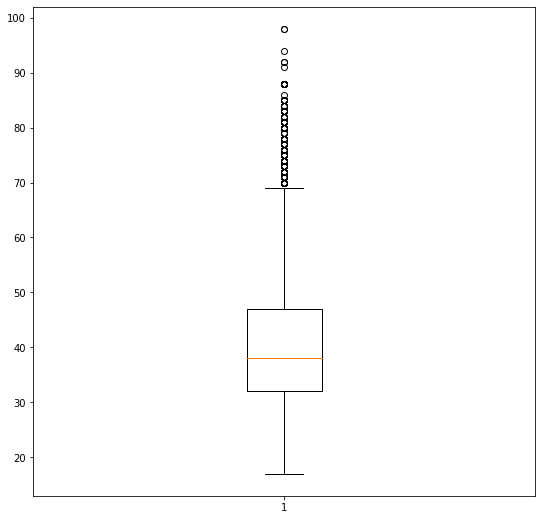

In [ ]:
plt.figure(figsize=(9,9))
plt.boxplot(bank_d['age'])
plt.show

In [ ]:
bank_d.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
bank_d['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [ ]:
bank_d['job'] = bank_d['job'].replace({'BLUE-COLLAR':'blue-collar','TECHNICIAN':'technician','MANAGEMENT':'management','RETIRED':'retired','SERVICES':'services','ADMIN.':'admin','UNKNOWN':'unknown','STUDENT':'student','HOUSEMAID':'housemaid'})

In [ ]:
bank_d['marital'].unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [ ]:
bank_d['marital'] = bank_d['marital'].replace({'D':'divorced','S':'single','M':'married'})

In [ ]:
bank_d['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
bank_d.shape

(17689, 21)

In [ ]:
bank_d[bank_d['marital']=='unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
206,52,services,unknown,professional.course,no,yes,no,telephone,jun,fri,7,2,999.0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0.0
228,30,technician,unknown,university.degree,no,no,no,cellular,oct,fri,131,2,16.0,1,success,-1.1,94.601,-49.5,0.942,4963.6,0.0
2188,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,366,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
3284,32,unknown,unknown,university.degree,no,no,no,telephone,jun,thu,36,7,999.0,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0.0
3751,31,entrepreneur,unknown,university.degree,no,yes,no,telephone,oct,thu,157,4,999.0,1,failure,-3.4,92.431,-26.9,0.722,5017.5,0.0
4280,31,entrepreneur,unknown,university.degree,no,no,no,cellular,oct,thu,164,1,999.0,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,1.0
4384,35,blue-collar,unknown,basic.9y,no,no,no,telephone,may,tue,81,5,999.0,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0.0
4735,55,technician,unknown,unknown,unknown,no,no,telephone,jun,thu,667,3,999.0,0,nonexistent,1.4,94.465,-41.8,4.955,5228.1,0.0
5422,35,self-employed,unknown,university.degree,no,no,no,cellular,nov,thu,221,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0.0
6206,32,unknown,unknown,university.degree,no,no,no,telephone,may,fri,617,4,999.0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,1.0


In [ ]:
bank_d["marital"].replace({'unknown':'married'}, inplace=True)



In [ ]:
bank_d['campaign'].unique()

array([ 1,  3,  2,  8,  5,  4, 25, 11, 12, 18,  6, 17,  7, 20, 16, 14, 10,
        9, 19, 29, 13, 40, 15, 34, 22, 24, 41, 21, 23, 39, 28, 27, 31, 35,
       26, 30, 32, 43, 33])

In [ ]:
bank_d['day_of_week'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [ ]:
bank_d['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [ ]:
bank_d['duration'].unique()

array([ 210,  138,  339, ..., 1150, 1745, 1187])

In [ ]:
bank_d['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [ ]:
bank_d['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'admin'], dtype=object)

In [ ]:
bank_d['job'].replace({'admin.':'admin'}, inplace=True)

In [ ]:
bank_d['education'].mode()

0    university.degree
dtype: object

In [ ]:
bank_d[bank_d['education']=='unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
21,35,blue-collar,single,unknown,no,no,yes,telephone,jun,fri,1114,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0.0
26,49,technician,divorced,unknown,no,yes,yes,cellular,oct,thu,81,1,999.0,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,0.0
69,44,blue-collar,married,unknown,unknown,yes,no,telephone,may,tue,336,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
70,28,unknown,single,unknown,unknown,yes,no,telephone,jun,thu,169,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17600,50,blue-collar,married,unknown,unknown,yes,no,telephone,may,fri,81,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0.0
17605,50,entrepreneur,married,unknown,unknown,yes,yes,cellular,jul,tue,163,1,999.0,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.0
17653,29,admin,single,unknown,no,yes,no,cellular,jul,mon,179,4,999.0,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0.0
17654,49,blue-collar,married,unknown,no,no,no,telephone,jun,thu,225,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0.0


In [ ]:
bank_d['education'].replace({'basic-4y':'university.degree','basic.4y':'university.degree','basic-6y':'professional.course','basic.6y':'professional.course','basic-9y':'high.school','basic.9y':'high.school','unknown':'university.degree'},inplace=True)

In [ ]:
bank_d['education'].unique()

array(['university.degree', 'high.school', 'professional.course',
       'illiterate'], dtype=object)

In [ ]:
bank_d['nr_employed'].unique()

array([5228.1, 5195.8, 4991.6, 5099.1, 5076.2, 5191. , 5017.5, 5008.7,
       4963.6, 5023.5, 5176.3,    nan])

In [ ]:
bank_d['poutcome'].unique()

array(['nonexistent', 'success', 'failure', nan], dtype=object)

In [ ]:
bank_d['poutcome'].value_counts()

nonexistent    15247
failure         1862
success          579
Name: poutcome, dtype: int64

In [ ]:
bank_d['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [ ]:
bank_d['default'].value_counts()

no         14018
unknown     3669
yes            2
Name: default, dtype: int64

In [ ]:
bank_d['default'].replace({'unknown':'no'},inplace=True)

In [ ]:
bank_d['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
bank_d['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
bank_d['loan'].value_counts()

no         14666
yes         2607
unknown      416
Name: loan, dtype: int64

In [ ]:
bank_d['loan'].replace({'unknown':'no'},inplace=True)

In [ ]:
bank_d.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.792857,259.151531,2.578061,968.075000,0.178061,0.130000,93.588770,-40.814439,3.684070,5170.337347,0.101531
married,42.260630,257.304551,2.556023,968.483226,0.162321,0.175888,93.601932,-40.262617,3.732283,5171.043402,0.105327
single,33.240056,261.181185,2.545545,956.403341,0.205648,-0.158115,93.524829,-40.874682,3.325711,5155.148210,0.139220


In [ ]:
bank_d.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0.0,39.865024,220.363938,2.624697,988.061231,0.133508,0.245224,93.605069,-40.564883,3.806097,5175.826095
1.0,40.843040,554.362784,2.021224,786.746298,0.507897,-1.233416,93.373603,-39.978776,2.106016,5093.940030


In [ ]:
bank_d.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
high.school,38.320704,261.364306,2.564276,971.396331,0.167494,8.138626e-02,93.601741,-41.101143,3.607321,5167.580905,0.097579
illiterate,47.444444,205.222222,2.222222,999.000000,0.111111,-8.943463e-17,93.404556,-43.177778,3.563111,5177.922222,0.111111
professional.course,40.157396,264.223411,2.519560,968.686430,0.150061,2.250611e-01,93.604696,-40.361858,3.764732,5172.871699,0.111247
university.degree,41.312750,253.945082,2.563491,957.931159,0.195179,8.264569e-03,93.547849,-40.034541,3.550195,5162.750477,0.130480


In [ ]:
bank_d.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin,37.983632,254.634081,2.615471,959.855605,0.190583,0.014215,93.535546,-40.272892,3.546199,5163.680135,0.133632
blue-collar,39.450892,263.467470,2.545592,991.302688,0.117056,0.246898,93.660228,-41.386109,3.763681,5175.431399,0.069329
entrepreneur,41.528594,255.945904,2.550232,994.505410,0.142195,0.147913,93.614836,-41.198609,3.782331,5174.744668,0.094281
housemaid,45.038813,266.200913,2.751142,967.264840,0.116438,0.451142,93.685416,-39.578539,4.022201,5180.493607,0.093607
management,42.376923,247.552308,2.458462,958.505385,0.206923,-0.064434,93.510346,-40.465435,3.545303,5164.145035,0.110855
retired,62.024161,271.336913,2.385235,892.291275,0.351678,-0.714362,93.428569,-38.418121,2.757635,5121.129799,0.261745
self-employed,40.245557,263.544426,2.675283,978.142165,0.174475,0.051858,93.543601,-40.590307,3.659819,5169.221971,0.092084
services,37.983636,267.416364,2.597576,977.936970,0.148485,0.206909,93.648946,-41.274545,3.732398,5172.885091,0.088485
student,26.051282,268.938462,2.130769,856.556410,0.523077,-1.420256,93.334797,-40.481538,1.862562,5085.758205,0.305128


In [ ]:
bank_d_job=bank_d['poutcome'].groupby(bank_d['job'])
bank_d_job

In [ ]:
bank_d.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,university.degree,no,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55,retired,married,university.degree,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1.0


In [ ]:
bank_data=bank_d['y'].groupby(bank_d['job']).mean()
bank_data

job
admin            0.133632
blue-collar      0.069329
entrepreneur     0.094281
housemaid        0.093607
management       0.110855
retired          0.261745
self-employed    0.092084
services         0.088485
student          0.305128
technician       0.110803
unemployed       0.132530
unknown          0.102564
Name: y, dtype: float64

(array([ 728., 4852., 5208., 3490., 2467.,  683.,  137.,   80.,   38.,
           6.]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

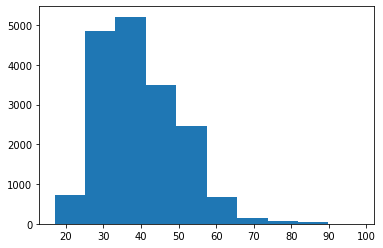

In [ ]:
plt.hist(bank_d['age'])

In [ ]:
bank_catg=bank_d.select_dtypes(include='object')
bank_catg.drop(['month','day_of_week'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
cols=bank_catg.columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')

In [ ]:
bank_d3=bank_d

In [ ]:
for i in cols:
  dummies =pd.get_dummies(bank_d[i],drop_first=True)
  bank_d3 = pd.concat([bank_d3,dummies],axis='columns')


In [ ]:
dummies

,nonexistent,success
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
17684,0,0
17685,1,0
17686,1,0
17687,1,0


In [ ]:
bank_d3

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,illiterate,professional.course,university.degree,yes,unknown,yes,yes,telephone,nonexistent,success
0,44,blue-collar,married,university.degree,no,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,55,retired,married,university.degree,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17684,35,admin,single,high.school,no,no,no,telephone,may,tue,339,4,999.0,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
17685,26,admin,married,high.school,no,no,no,telephone,jun,tue,48,2,999.0,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
17686,32,housemaid,married,high.school,no,no,no,telephone,may,tue,226,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
17687,55,technician,single,professional.course,no,yes,yes,cellular,mar,mon,217,2,999.0,0,nonexistent,-1.8,92.843,-50.0,1.703,5099.1,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0


In [ ]:
bank_catg

,job,marital,education,default,housing,loan,contact,poutcome
0,blue-collar,married,university.degree,no,yes,no,cellular,nonexistent
1,technician,married,university.degree,no,no,no,cellular,nonexistent
2,management,single,university.degree,no,yes,no,cellular,success
3,services,married,high.school,no,no,no,cellular,nonexistent
4,retired,married,university.degree,no,yes,no,cellular,success
...,...,...,...,...,...,...,...,...
17684,admin,single,high.school,no,no,no,telephone,failure
17685,admin,married,high.school,no,no,no,telephone,nonexistent
17686,housemaid,married,high.school,no,no,no,telephone,nonexistent
17687,technician,single,professional.course,no,yes,yes,cellular,nonexistent


In [ ]:
bank_d3.drop(['job','marital','education','housing','loan','default','contact','month','day_of_week'],axis=1,inplace=True)

In [ ]:
bank_d3.drop(['poutcome'],axis=1,inplace=True)

In [ ]:
bank_d3

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,illiterate,professional.course,university.degree,yes,unknown,yes,yes,telephone,nonexistent,success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17684,35,339,4,999.0,1,-1.8,92.893,-46.2,1.291,5099.1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
17685,26,48,2,999.0,0,1.4,94.465,-41.8,4.864,5228.1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
17686,32,226,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
17687,55,217,2,999.0,0,-1.8,92.843,-50.0,1.703,5099.1,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0


In [ ]:
X.isnull().sum()

age                    0
duration               0
campaign               0
pdays                  0
previous               0
emp_var_rate           1
cons_price_idx         1
cons_conf_idx          1
euribor3m              1
nr_employed            1
blue-collar            0
entrepreneur           0
housemaid              0
management             0
retired                0
self-employed          0
services               0
student                0
technician             0
unemployed             0
unknown                0
married                0
single                 0
illiterate             0
professional.course    0
university.degree      0
yes                    0
unknown                0
yes                    0
yes                    0
telephone              0
nonexistent            0
success                0
dtype: int64

In [ ]:
X.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X.isnull().sum()

age                    0
duration               0
campaign               0
pdays                  0
previous               0
emp_var_rate           0
cons_price_idx         0
cons_conf_idx          0
euribor3m              0
nr_employed            0
blue-collar            0
entrepreneur           0
housemaid              0
management             0
retired                0
self-employed          0
services               0
student                0
technician             0
unemployed             0
unknown                0
married                0
single                 0
illiterate             0
professional.course    0
university.degree      0
yes                    0
unknown                0
yes                    0
yes                    0
telephone              0
nonexistent            0
success                0
dtype: int64

In [ ]:
X=bank_d3.drop(['y'],axis=1)
X.dropna(inplace=True)
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single,illiterate,professional.course,university.degree,yes,unknown,yes,yes,telephone,nonexistent,success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17683,58,17,11,999.0,0,1.4,93.444,-36.1,4.962,5228.1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
17684,35,339,4,999.0,1,-1.8,92.893,-46.2,1.291,5099.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
17685,26,48,2,999.0,0,1.4,94.465,-41.8,4.864,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
17686,32,226,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
Y=bank_d3.iloc[:17688,11]

Y

0        1
1        0
2        0
3        0
4        0
        ..
17683    0
17684    0
17685    0
17686    0
17687    0
Name: blue-collar, Length: 17688, dtype: uint8

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
x_test.isnull().sum()

age                    0
duration               0
campaign               0
pdays                  0
previous               0
emp_var_rate           0
cons_price_idx         0
cons_conf_idx          0
euribor3m              0
nr_employed            0
blue-collar            0
entrepreneur           0
housemaid              0
management             0
retired                0
self-employed          0
services               0
student                0
technician             0
unemployed             0
unknown                0
married                0
single                 0
illiterate             0
professional.course    0
university.degree      0
yes                    0
unknown                0
yes                    0
yes                    0
telephone              0
nonexistent            0
success                0
dtype: int64

In [ ]:
model=LogisticRegression(verbose=1)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 0 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2729
           1       0.78      0.52      0.63       809

    accuracy                           0.86      3538
   macro avg       0.83      0.74      0.77      3538
weighted avg       0.85      0.86      0.85      3538



In [ ]:
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, Y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of X before SMOTE: (17688, 33)
Shape of X after SMOTE: (27414, 33)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Accuracy = 0.96
Recall = 0.97



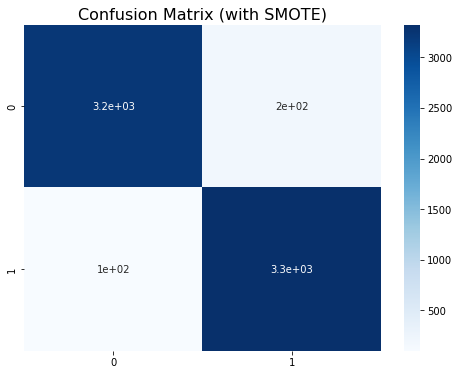

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = LogisticRegression(verbose=1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
#Test the model
predictions = model.predict(X_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 1 0 ... 1 1 0]

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3431
           1       0.94      0.97      0.96      3423

    accuracy                           0.96      6854
   macro avg       0.96      0.96      0.96      6854
weighted avg       0.96      0.96      0.96      6854



In [ ]:
from sklearn import metrics
print("The confusion matrix is")
print(metrics.confusion_matrix(y_test,predictions))

The confusion matrix is
[[3229  202]
 [ 101 3322]]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
from sklearn.feature_selection import RFE
n_features_to_select = 6
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(x_train_sm, y_train_sm)

RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=10,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=6, step=1, verbose=0)

In [ ]:
model=LogisticRegression(verbose=1)
model.fit(x_train_sm,y_train_sm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(model, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

[False False False False  True False False False False False  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False  True False False False False  True False  True]
[14 18 13 17  1  5  4  6 10 15  1  1  1  1  1  1  1  1  1  1  1  1  2 11
  3  1 16  9 12  7  1  8  1]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.955792,0.942679,0.970494,0.956384
1,Logistic Regression RFE (Lasso),0.955792,0.942679,0.970494,0.956384


In [ ]:
#Predicting Test set
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.955792,0.942679,0.970494,0.956384
